In [ ]:
#Load Dataset

In [2]:
import pandas as pd

df = pd.read_csv("../data/customers.csv")

df.head()


,Customer ID,Age,Gender,Location,Annual Income,Purchase History,Browsing History,Product Reviews,Time on Site
0,1001,25,Female,City D,45000,"[{""Date"": ""2022-03-05"", ""Category"": ""Clothing""...","[{""Timestamp"": ""2022-03-10T14:30:00Z""}, {""Time...","Great pair of jeans, very comfortable. Rating:...",32.50
1,1001,28,Female,City D,52000,"[{""Product Category"": ""Clothing"", ""Purchase Da...","[{""Product Category"": ""Home & Garden"", ""Timest...",Great customer service!,123.45
2,1001,28,Female,City D,65000,"[{""Product Category"": ""Electronics"", ""Purchase...","[{""Product Category"": ""Clothing"", ""Timestamp"":...",Great electronics. The sound quality is excell...,125.60
3,1001,45,Female,City D,70000,"{'Purchase Date': '2022-08-15', 'Product Categ...",{'Timestamp': '2022-09-03 14:30:00'},"{""Product 1"": {""Rating"": 4, ""Review"": ""Great e...",327.60
4,1002,34,Male,City E,45000,"{'Purchase Date': '2022-07-25', 'Product Categ...",{'Timestamp': '2022-08-10 17:15:00'},"{""Product 1"": {""Rating"": 3, ""Review"": ""Good pr...",214.90


In [3]:
df.shape


(50, 9)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer ID       50 non-null     int64  
 1   Age               50 non-null     int64  
 2   Gender            50 non-null     object 
 3   Location          50 non-null     object 
 4   Annual Income     50 non-null     int64  
 5   Purchase History  50 non-null     object 
 6   Browsing History  50 non-null     object 
 7   Product Reviews   50 non-null     object 
 8   Time on Site      50 non-null     float64
dtypes: float64(1), int64(3), object(5)
memory usage: 3.6+ KB


In [5]:
df.isnull().sum()


Customer ID         0
Age                 0
Gender              0
Location            0
Annual Income       0
Purchase History    0
Browsing History    0
Product Reviews     0
Time on Site        0
dtype: int64

In [6]:
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Location', 'Annual_Income',
       'Purchase_History', 'Browsing_History', 'Product_Reviews',
       'Time_on_Site'],
      dtype='object')

In [ ]:
#Understand Dataset & Decide ML Features

In [7]:
import ast

def count_purchases(x):
    try:
        data = ast.literal_eval(str(x))
        if isinstance(data, list):
            return len(data)
        else:
            return 1
    except:
        return 0

df["Total_Purchases"] = df["Purchase_History"].apply(count_purchases)


In [8]:
import re

def extract_rating(text):
    try:
        match = re.search(r'Rating[: ]+(\d)', str(text))
        if match:
            return int(match.group(1))
        else:
            return 3   # default neutral rating
    except:
        return 3

df["Avg_Rating"] = df["Product_Reviews"].apply(extract_rating)


In [9]:
features = df[[
    "Age",
    "Annual_Income",
    "Time_on_Site",
    "Total_Purchases",
    "Avg_Rating"
]]

features.head()


,Age,Annual_Income,Time_on_Site,Total_Purchases,Avg_Rating
0,25,45000,32.50,3,4
1,28,52000,123.45,2,3
2,28,65000,125.60,2,3
3,45,70000,327.60,1,3
4,34,45000,214.90,1,3


In [ ]:
#Data Scaling

In [10]:
from sklearn.preprocessing import StandardScaler


In [11]:
scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)

scaled_features


array([[-1.36543646, -1.23044428, -1.84306538,  2.62475604,  7.        ],
       [-1.09161899, -0.8159539 , -1.00533769,  1.02429504, -0.14285714],
       [-1.09161899, -0.04618607, -0.98553435,  1.02429504, -0.14285714],
       [ 0.46001335,  0.24987848,  0.8750593 , -0.57616596, -0.14285714],
       [-0.54398404, -1.23044428, -0.16300458, -0.57616596, -0.14285714],
       [ 1.46401075,  1.43413669,  2.33682272, -0.57616596, -0.14285714],
       [-1.0003465 , -0.34225062,  1.34389205, -0.57616596, -0.14285714],
       [ 0.18619588,  0.54594303,  0.5268888 , -0.57616596, -0.14285714],
       [ 1.00764829,  1.13807214,  2.05957584, -0.57616596, -0.14285714],
       [-0.36143906, -0.63831517,  0.94229857, -0.57616596, -0.14285714],
       [ 0.73383082,  0.84200759,  0.60794437, -0.57616596, -0.14285714],
       [-1.36543646, -1.52650883,  0.73597532, -0.57616596, -0.14285714],
       [ 0.46001335,  0.54594303, -1.03711516, -0.57616596, -0.14285714],
       [-0.72652902, -0.93437973, -1.4

In [12]:
import pandas as pd

scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

scaled_df.head()


,Age,Annual_Income,Time_on_Site,Total_Purchases,Avg_Rating
0,-1.365436,-1.230444,-1.843065,2.624756,7.000000
1,-1.091619,-0.815954,-1.005338,1.024295,-0.142857
2,-1.091619,-0.046186,-0.985534,1.024295,-0.142857
3,0.460013,0.249878,0.875059,-0.576166,-0.142857
4,-0.543984,-1.230444,-0.163005,-0.576166,-0.142857


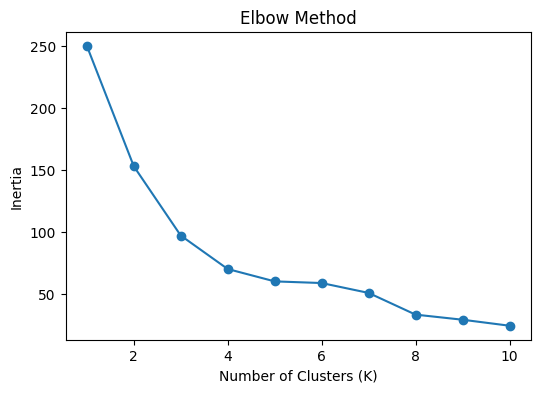

In [14]:
#Find Optimal Number of Clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()



In [15]:
#Silhouette Score
from sklearn.metrics import silhouette_score

for k in range(2, 7):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    print(f"K = {k} → Silhouette Score = {score}")


K = 2 → Silhouette Score = 0.3861548352207269
K = 3 → Silhouette Score = 0.3957987245045701
K = 4 → Silhouette Score = 0.38089187394635815
K = 5 → Silhouette Score = 0.28926685012589287
K = 6 → Silhouette Score = 0.2037522862737966


In [16]:
#Train Final KMeans Model
final_kmeans = KMeans(n_clusters=3, random_state=42)

cluster_labels = final_kmeans.fit_predict(scaled_df)

cluster_labels

#Add Cluster Labels To Original Data

df["Cluster"] = cluster_labels

df[["Customer_ID", "Age", "Annual_Income", "Time_on_Site", "Total_Purchases", "Avg_Rating", "Cluster"]].head()

#Check Cluster Counts
df["Cluster"].value_counts()



Cluster
0    27
1    22
2     1
Name: count, dtype: int64

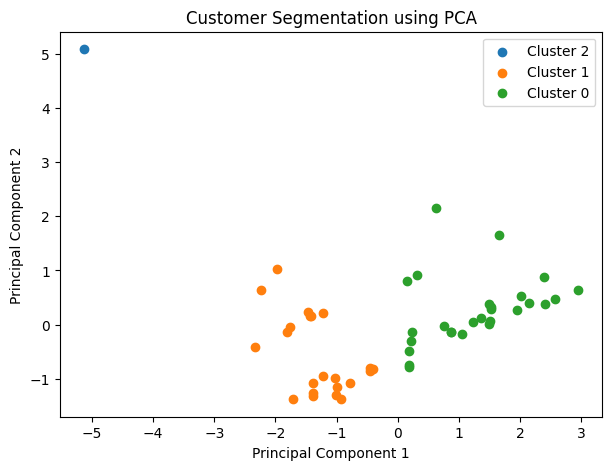

In [17]:
#PCA Visualization
from sklearn.decomposition import PCA

#Reduce Dimensions

pca = PCA(n_components=2)

pca_data = pca.fit_transform(scaled_df)

#Create PCA DataFrame

pca_df = pd.DataFrame(data=pca_data, columns=["PC1", "PC2"])

pca_df["Cluster"] = cluster_labels

pca_df.head()


#Plot Clusters

import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

for cluster in pca_df["Cluster"].unique():
    cluster_data = pca_df[pca_df["Cluster"] == cluster]
    plt.scatter(cluster_data["PC1"], cluster_data["PC2"], label=f"Cluster {cluster}")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segmentation using PCA")
plt.legend()
plt.show()


In [18]:
#Analyze Each Cluster
cluster_summary = df.groupby("Cluster")[[
    "Age",
    "Annual_Income",
    "Time_on_Site",
    "Total_Purchases",
    "Avg_Rating"
]].mean()

cluster_summary


,Age,Annual_Income,Time_on_Site,Total_Purchases,Avg_Rating
Cluster,,,,,
0,48.185185,78518.518519,303.288889,1.185185,3.0
1,30.545455,51090.909091,154.934091,1.500000,3.0
2,25.000000,45000.000000,32.500000,3.000000,4.0


In [19]:
df["Customer_Type"]


KeyError: 'Customer_Type'

In [20]:
def assign_customer_type(cluster):
    if cluster == 0:
        return "Premium Browsers"
    elif cluster == 1:
        return "Standard Customers"
    else:
        return "Loyal Fast Buyer (VIP)"

df["Customer_Type"] = df["Cluster"].apply(assign_customer_type)

df[["Customer_ID", "Customer_Type", "Cluster"]].head()


,Customer_ID,Customer_Type,Cluster
0,1001,Loyal Fast Buyer (VIP),2
1,1001,Standard Customers,1
2,1001,Standard Customers,1
3,1001,Premium Browsers,0
4,1002,Standard Customers,1


In [22]:
def marketing_strategy(customer_type):
    if customer_type == "Premium Browsers":
        return "Offer premium products, personalized recommendations"
    elif customer_type == "Standard Customers":
        return "Provide discounts and seasonal offers"
    else:
        return "Loyalty rewards and exclusive deals"

df["Marketing_Strategy"] = df["Customer_Type"].apply(marketing_strategy)

df[["Customer_Type", "Marketing_Strategy"]].head()


,Customer_Type,Marketing_Strategy
0,Loyal Fast Buyer (VIP),Loyalty rewards and exclusive deals
1,Standard Customers,Provide discounts and seasonal offers
2,Standard Customers,Provide discounts and seasonal offers
3,Premium Browsers,"Offer premium products, personalized recommend..."
4,Standard Customers,Provide discounts and seasonal offers


In [23]:
df.to_csv("../outputs/segmented_customers.csv", index=False)

print("Segmented customer file saved successfully!")


Segmented customer file saved successfully!
